In [1]:
# 라이브러리 불러오기

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [5]:
# Excel 데이터를 데이터프레임으로 변환

In [6]:
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

In [7]:
# 누락값(NaN을 앞 데이터로 채움(엑셀 양식 병합 부분)

In [8]:
df = df.fillna(method='ffill')

In [9]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리

In [10]:
mask = (df['전출지별']=='서울특별시') & (df['전입지별'] != '서울특별시')

In [11]:
df_seoul = df[mask]

In [12]:
df_seoul = df_seoul.drop(['전출지별'], axis=1)

In [13]:
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)

In [14]:
df_seoul.set_index('전입지', inplace=True)

In [15]:
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


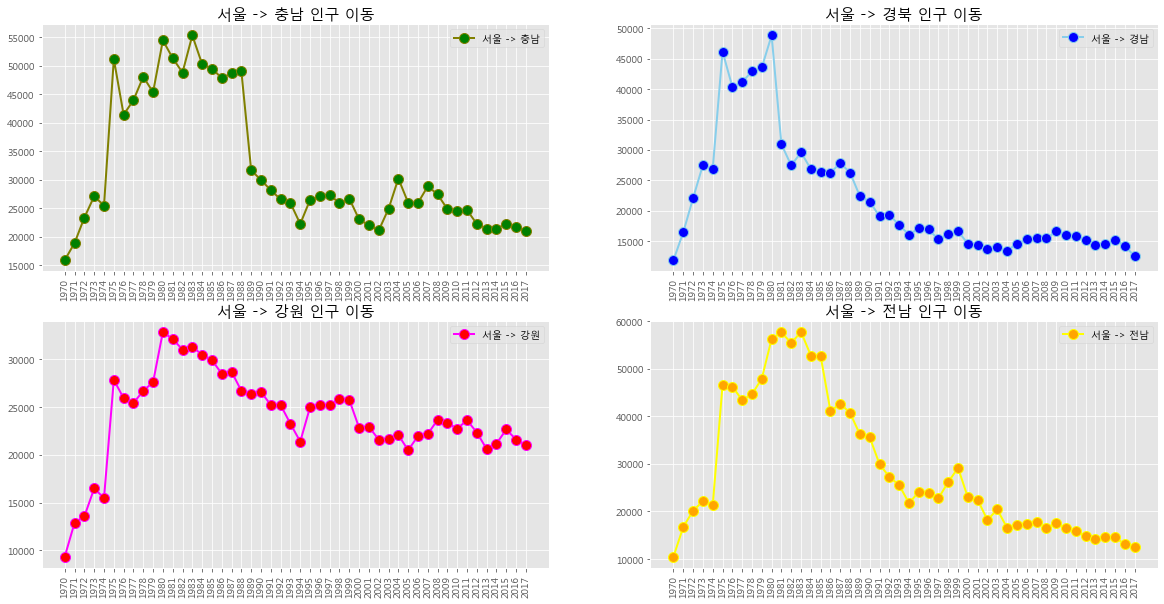

In [16]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years=list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green',
         markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue',
         markersize=10, color='skyblue', linewidth=2, label='서울 -> 경남')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red',
         markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:],marker='o', markerfacecolor='orange',
         markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size = 15)
ax2.set_title('서울 -> 경북 인구 이동', size = 15)
ax3.set_title('서울 -> 강원 인구 이동', size = 15)
ax4.set_title('서울 -> 전남 인구 이동', size = 15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

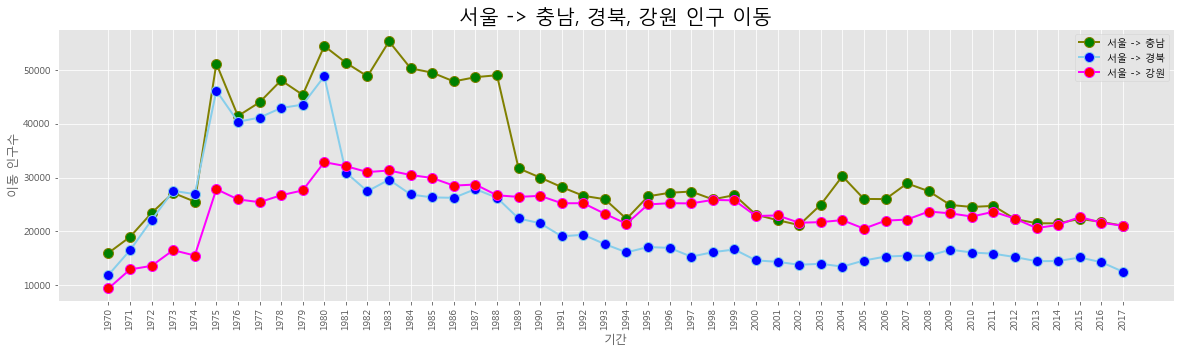

In [17]:
# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3=df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size =20)

# 축 이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

In [18]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택

In [19]:
sr_one = df_seoul.loc['경기도']

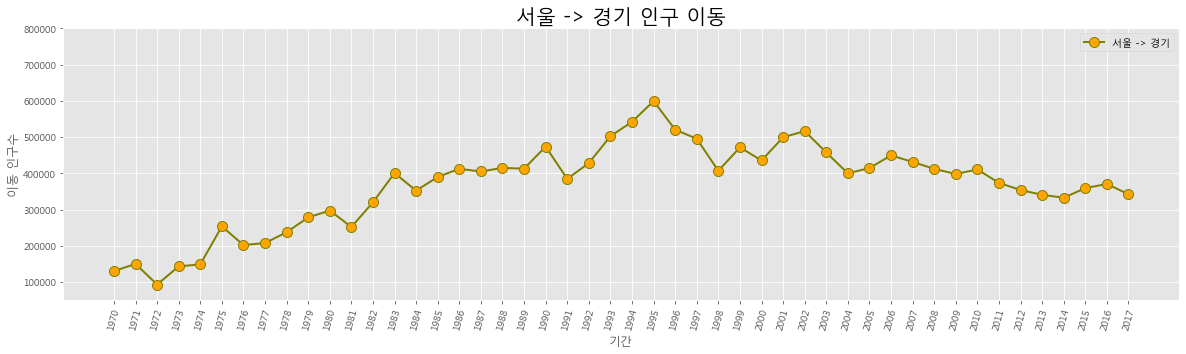

In [20]:
# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker = 'o', markerfacecolor='orange', markersize = 10, 
         color = 'olive', linewidth = 2, label='서울 -> 경기')
ax.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

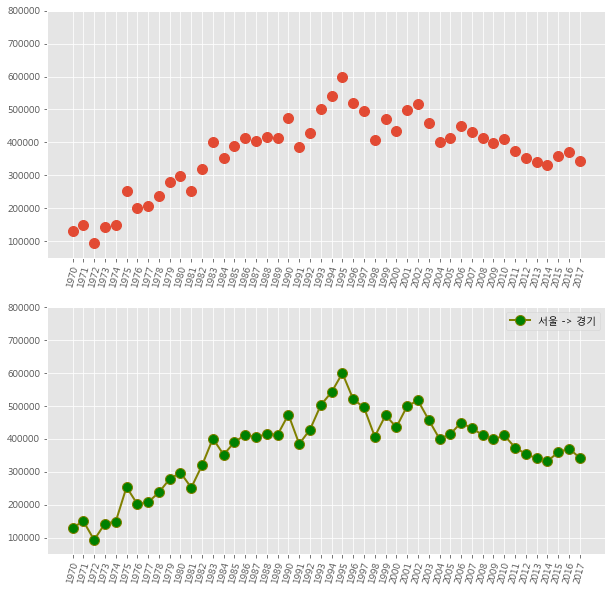

In [21]:
# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, 
         color = 'olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

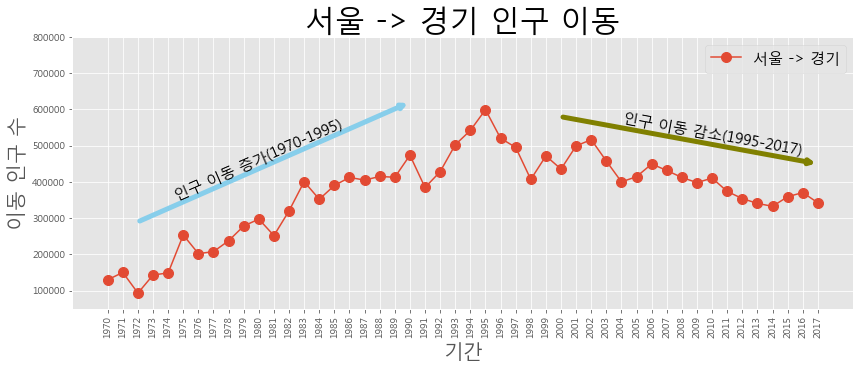

In [22]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정 (가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축의 눈금 라벨 회전하기
plt.xticks(size = 10, rotation='vertical')

# x, y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동', size = 30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구 수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
            xy=(20, 620000), # 화살표의 머리 부분(끝점)
             xytext=(2, 290000), # 화살표의 꼬리 부분(시작점)
             xycoords='data', # 좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), # 화살표 서식
            )

plt.annotate('',
             xy=(47, 450000), # 화살표의 머리 부분(끝점)
             xytext=(30, 580000), # 화살표의 꼬리 부분(시작)
             xycoords='data', # 좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5), # 화살표 서식
            )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)', # 텍스트 입력
            xy = (10, 350000),            # 텍스트 위치 기준점 
            rotation = 23.5,              # 텍스트 회전 각도
            va = 'baseline',              # 텍스트 상하 정렬
            ha = 'center',                # 텍스트 좌우 정렬
            fontsize = 15                 # 텍스트 크기
            )

plt.annotate('인구 이동 감소(1995-2017)',
            xy=(40, 476000),
            rotation=-10.5,
            va='baseline',
            ha='center',
            fontsize = 15,
            )

plt.show()

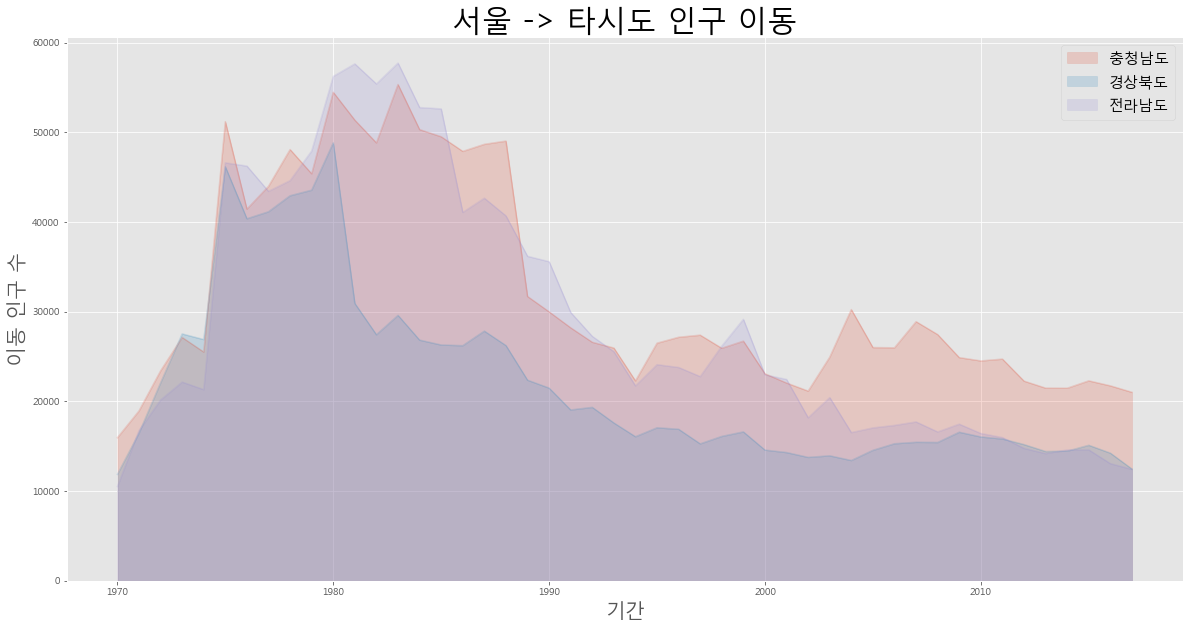

In [23]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

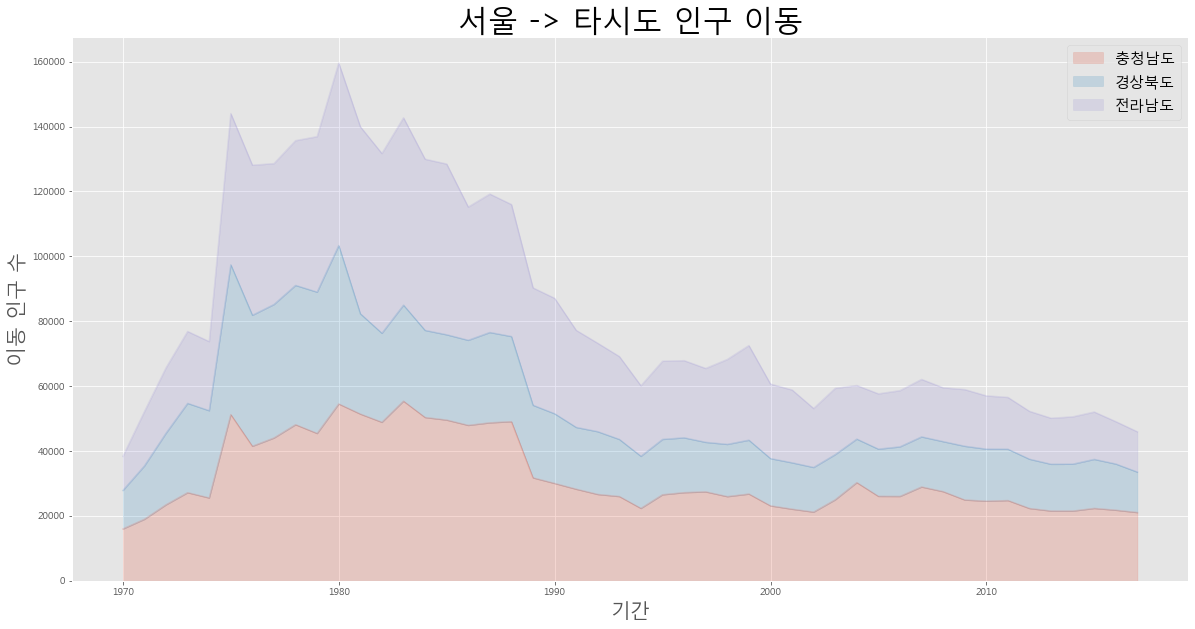

In [24]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

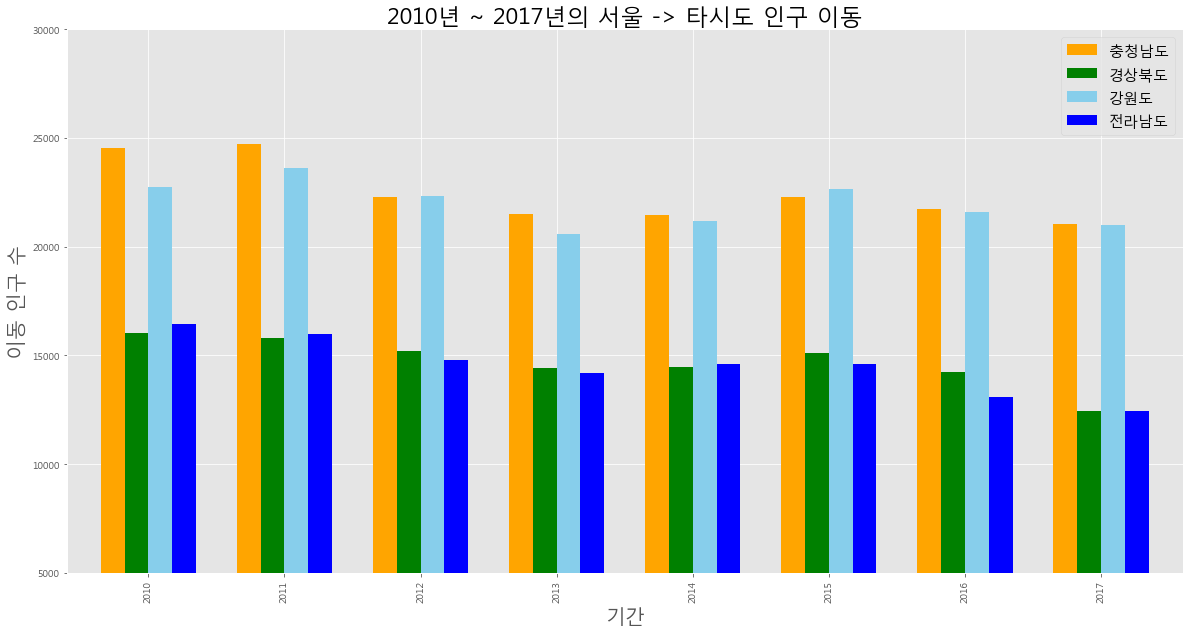

In [29]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4=df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대그래프 그리기
df_4.plot(kind='bar', figsize = (20, 10), width = 0.7,
          color = ['orange', 'green', 'skyblue', 'blue'])

plt.title('2010년 ~ 2017년의 서울 -> 타시도 인구 이동', size = 23)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

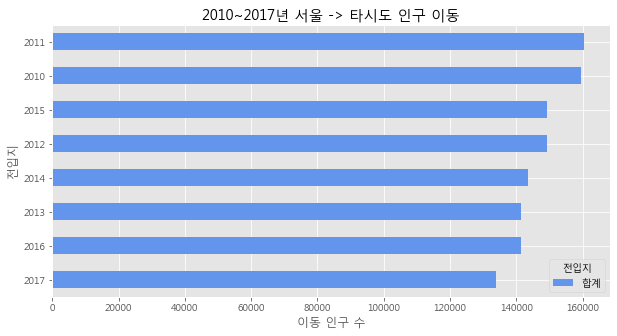

In [31]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 - df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 2010 ~ 2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계']=df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('2010~2017년 서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()